# **TWITTER SENTIMENT ANALYSIS** | ASSIGNMENT

### 1. IMPORT DEPENDENCIES

In [20]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import tweepy
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
%matplotlib inline

import re
import nltk

### 2. TWITTER API AUTHENTICATION VARIABLES

In [2]:
consumer_key = ''                           # add your own key
consumer_secret = ''                        # add your own secret
access_token = ''                           # add your own token
access_token_secret = ''                    # add your own token_secret

### 3. AUTHENTICATE WITH TWITTER

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

### 4. DEFINE CLEANING FUNCTION

In [4]:
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", ' ', tweet).split())

### 5. FIND RELATED TWEETS

In [5]:
tweets = api.search('Gibson guitars', count=200)

# clean and convert tweets (type: tweepy.models.SearchResults) to DataFrame
data = pd.DataFrame(data=[clean_tweet(tweet.text) for tweet in tweets], columns=['Tweets'])

# display first 5 elements of the dataframe
data.head(5)

,Tweets
0,My double cuts guitarra guitars guitarstrings ...
1,RT pela m sica caminhos novos chegarei guitars...
2,pela m sica caminhos novos chegarei guitars gu...
3,Moe s Guitars amp Amps By appointment Hawthorn...
4,Well as its the legendary s birthday today we ...


In [6]:
# show Meta Data from a single tweet
print('id:                ', tweets[0].id)
print('created_at:        ', tweets[0].created_at)
print('source:            ', tweets[0].source)
print('favorite_count:    ', tweets[0].favorite_count)
print('retweet_count:     ', tweets[0].retweet_count)
print('geo:               ', tweets[0].geo)
print('coordinates:       ', tweets[0].coordinates)
print('entities:          ', tweets[0].entities)

id:                 1093146767938514944
created_at:         2019-02-06 13:57:53
source:             Twitter for iPhone
favorite_count:     0
retweet_count:      0
geo:                None
coordinates:        None
entities:           {'hashtags': [{'text': 'guitarra', 'indices': [21, 30]}, {'text': 'guitars', 'indices': [31, 39]}, {'text': 'guitarstrings', 'indices': [40, 54]}, {'text': 'gibsons', 'indices': [55, 63]}, {'text': 'gibsonguitars', 'indices': [64, 78]}, {'text': 'gibsonguitar', 'indices': [79, 92]}, {'text': 'prsguitars', 'indices': [93, 104]}, {'text': 'prsguitar', 'indices': [105, 115]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/JoJ2xd5kzy', 'expanded_url': 'https://twitter.com/i/web/status/1093146767938514944', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}


### 6. ANALYSE TWEETS SENTIMENT

In [7]:
sid = SentimentIntensityAnalyzer()

list = []
for index, row in data.iterrows():
    ss = sid.polarity_scores(row['Tweets'])
    list.append(ss)
se = pd.Series(list)
data['polarity'] = se.values

# Display first 5 elements of the DataFrame:
data.head()

,Tweets,polarity
0,My double cuts guitarra guitars guitarstrings ...,"{'neg': 0.18, 'neu': 0.82, 'pos': 0.0, 'compou..."
1,RT pela m sica caminhos novos chegarei guitars...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,pela m sica caminhos novos chegarei guitars gu...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,Moe s Guitars amp Amps By appointment Hawthorn...,"{'neg': 0.0, 'neu': 0.862, 'pos': 0.138, 'comp..."
4,Well as its the legendary s birthday today we ...,"{'neg': 0.0, 'neu': 0.896, 'pos': 0.104, 'comp..."


### 7. EXTRACT POLARITIES

In [8]:
# extract each polarity value in a separate column
polarity_types = ['neg', 'neu', 'pos', 'compound']

# create empty columns
for polar_type in polarity_types:
    data[polar_type] = np.nan

In [9]:
for i in range(len(data)):
    for polar_type in polarity_types:
        data[polar_type][i] = data['polarity'][i][polar_type]

In [10]:
data.head()

,Tweets,polarity,neg,neu,pos,compound
0,My double cuts guitarra guitars guitarstrings ...,"{'neg': 0.18, 'neu': 0.82, 'pos': 0.0, 'compou...",0.18,0.820,0.000,-0.2960
1,RT pela m sica caminhos novos chegarei guitars...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.00,1.000,0.000,0.0000
2,pela m sica caminhos novos chegarei guitars gu...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.00,1.000,0.000,0.0000
3,Moe s Guitars amp Amps By appointment Hawthorn...,"{'neg': 0.0, 'neu': 0.862, 'pos': 0.138, 'comp...",0.00,0.862,0.138,0.3400
4,Well as its the legendary s birthday today we ...,"{'neg': 0.0, 'neu': 0.896, 'pos': 0.104, 'comp...",0.00,0.896,0.104,0.2732


### 8. VISUALIZE DATA

Text(0.5, 1.0, 'ALL TWEETS POLARITY')

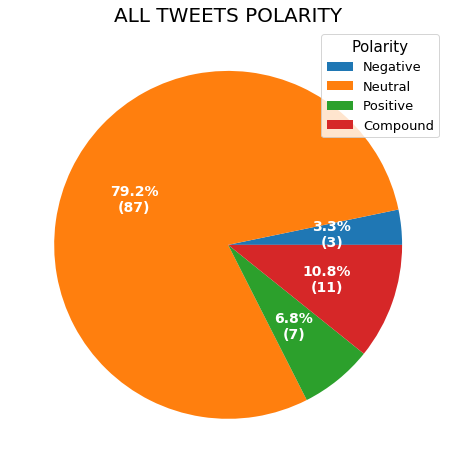

In [30]:
data_score = pd.Series([data['neg'].sum(), data['neu'].sum(), data['pos'].sum(), data['compound'].sum()])

# visualize
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))
tweets_polarity = data_score

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data_score, autopct=lambda pct: func(pct, data_score), textprops=dict(color="w"))
names = ['Negative', 'Neutral', 'Positive', 'Compound']
ax.legend(wedges, names, fontsize=13 , loc='best', title= 'Polarity', title_fontsize=15)
plt.setp(autotexts, size=14, weight="bold")

ax.set_title('ALL TWEETS POLARITY', fontsize=20)

Most popular words in all tweets


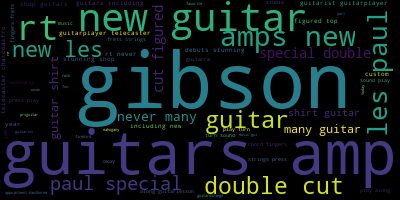

In [31]:
import wordcloud

# convert to lowercase
data['lower_tweets'] = data['Tweets'].map(lambda x: x.lower())

# join the different processed tweets together
long_string = " ".join(data['lower_tweets'])

# create wordcloud subject
wordcloud = wordcloud.WordCloud()

# generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
print('Most popular words in all tweets')
wordcloud.to_image()

In [51]:
# show 5 most frequent words in all tweets:
i = 0
print('5 most frequent words in all tweets:')

for key, value in wordcloud.words_.items():
    if i < 5: print(key, ': ', value)
    i += 1

5 most frequent words in all tweets:
gibson :  1.0
guitars amp :  0.7
new guitar :  0.65
rt :  0.525
amps new :  0.475
